In [1]:
from graphviz import Digraph
from Node import FileNode, FncNode
from utils.algos import xfs

In [2]:
"""def test1():
    print("hello")

def test2():
    test1()
    
def test3():
    def test3_1():
        print("nested")"""

'def test1():\n    print("hello")\n\ndef test2():\n    test1()\n    \ndef test3():\n    def test3_1():\n        print("nested")'

In [3]:
filenode = FileNode("/path/to/module.py", "module")
filenode.scope = [1, 7]

fnc_test1 = FncNode("/path/to/module.py", "test1")
fnc_test1.scope = [1, 2]

fnc_test2 = FncNode("/path/to/module.py", "test2")
fnc_test2.scope = [3, 4]

fnc_test3 = FncNode("/path/to/module.py", "test3")
fnc_test3.scope = [5, 7]

fnc_test3_1 = FncNode("/path/to/module.py", "test3_1")
fnc_test3_1.scope = [6, 7]

fnc_test3.add_child(fnc_test3_1)

# create "add_calls" method for FncNode
fnc_test2.calls.append(fnc_test1)

filenode.add_child(fnc_test1)
filenode.add_child(fnc_test2)
filenode.add_child(fnc_test3)

In [4]:
filenode.children

{'test1': FncNode(name='test1', location='/path/to/module.py', children='False'),
 'test2': FncNode(name='test2', location='/path/to/module.py', children='False'),
 'test3': FncNode(name='test3', location='/path/to/module.py', children='True')}

In [5]:
filenode.get_child("test2").calls

[FncNode(name='test1', location='/path/to/module.py', children='False')]

In [9]:
xfs(filenode, search_type="bfs")

FileNode(name='module', location='/path/to/module.py', children='True')
FncNode(name='test3', location='/path/to/module.py', children='True')
FncNode(name='test3_1', location='/path/to/module.py', children='False')
FncNode(name='test2', location='/path/to/module.py', children='False')
FncNode(name='test1', location='/path/to/module.py', children='False')


In [7]:
dot = Digraph(comment='module.py')

dot.node("test1", "test1", shape="rectangle")
dot.node("test2", "test2", shape="rectangle")

with dot.subgraph(name="cluster_test3") as test3:
    test3.node("test3_1", shape="rectangle")
    test3.attr(label="test3")
    
dot.edge("test2", "test1", constraint='false')

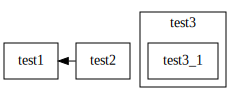

In [8]:
dot